#**P NIKHIL KRISHNA**
#**HU21CSEN0300328**
#**USE CASE 2 - Abalone Dataset**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os

In [ ]:
data = pd.read_csv("/content/abalone_PCA.csv")

In [ ]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#**WITHOUT PCA**

In [ ]:
X = data.drop(["Rings"],axis=1)
Y = data.Rings

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=20)

In [ ]:
X_train.shape

(2923, 7)

In [ ]:
knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)
print("Train score before PCA",knn.score(X_train,y_train),"%")
print("Test score before PCA",knn.score(X_test,y_test),"%")

Train score before PCA 0.4149846048580226 %
Test score before PCA 0.20972886762360446 %


#**WITH PCA**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)

In [ ]:
pca.get_covariance()

array([[0.0263373 , 0.02671094, 0.00497119, 0.02607972, 0.02175153,
        0.02115053, 0.02020923],
       [0.02671094, 0.0278188 , 0.00514694, 0.02680872, 0.02223664,
        0.02165798, 0.02094625],
       [0.00497119, 0.00514694, 0.00137012, 0.00526663, 0.00428188,
        0.00426476, 0.00419673],
       [0.02607972, 0.02680872, 0.00526663, 0.03016518, 0.02513205,
        0.02422356, 0.02301697],
       [0.02175153, 0.02223664, 0.00428188, 0.02513205, 0.02228122,
        0.02007736, 0.01827562],
       [0.02115053, 0.02165798, 0.00426476, 0.02422356, 0.02007736,
        0.02082948, 0.0181715 ],
       [0.02020923, 0.02094625, 0.00419673, 0.02301697, 0.01827562,
        0.0181715 , 0.01924245]])

In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.93679718, 0.03153659, 0.01626195, 0.0093007 , 0.00260248,
       0.00229245, 0.00120865])

#**Model will be able to predict 90 to 95% data using 2 Principal Components**

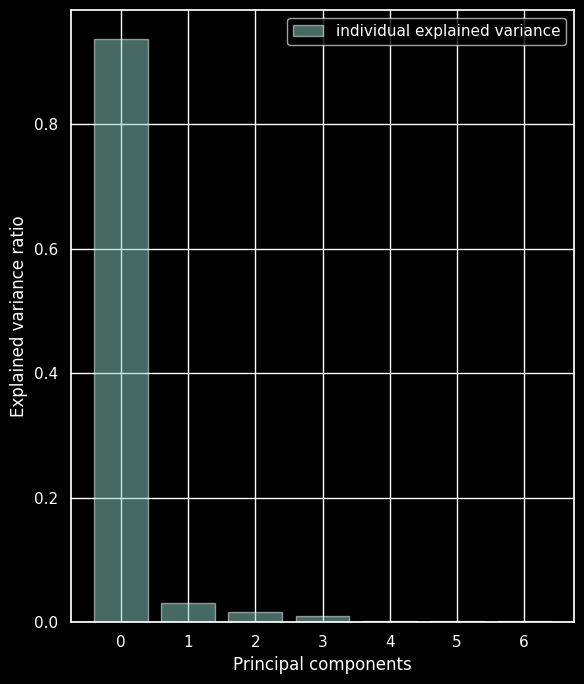

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 7))

    plt.bar(range(7), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
cumulative_variance = np.cumsum(explained_variance)

n_components_90 = np.argmax(cumulative_variance >= 0.9) + 1
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f'Number of components to explain 90% of variance: {n_components_90}')
print(f'Number of components to explain 95% of variance: {n_components_95}')

Number of components to explain 90% of variance: 1
Number of components to explain 95% of variance: 2


#**Model with 3 PCAs**

In [ ]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)

In [ ]:
print(X_new)

[[-0.23081559 -0.02656329 -0.00678646]
 [-0.49767081  0.04379106  0.00304922]
 [-0.06885678 -0.08145397  0.01171976]
 ...
 [ 0.27393757  0.01903742 -0.02508556]
 [ 0.26228233 -0.02765864 -0.045737  ]
 [ 0.73902813  0.13032208 -0.04692217]]


In [ ]:
df=pd.DataFrame(X_new)
df.head(10)

,0,1,2
0,-0.230816,-0.026563,-0.006786
1,-0.497671,0.043791,0.003049
2,-0.068857,-0.081454,0.011720
3,-0.230997,-0.012962,0.004214
4,-0.532797,0.057362,-0.000513
5,-0.365677,0.001097,0.009902
6,-0.017584,-0.055328,0.120170
7,-0.011209,-0.066032,0.035870
8,-0.205363,-0.042998,0.004117
9,0.052356,-0.055884,0.079397


In [ ]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, Y, test_size = 0.3, random_state=20)

In [ ]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA 0.39616832021895315 %
Test score after PCA 0.24720893141945774 %


#**Model with 2 PCAs**

In [ ]:
# model with two PCAs
pca=PCA(n_components=2)
X_new=pca.fit_transform(X)

In [ ]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, Y, test_size = 0.3, random_state=20)

In [ ]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA 0.4036948340745809 %
Test score after PCA 0.215311004784689 %


#**Converting ipynb file into HTML**

In [ ]:
%%shell
jupyter nbconvert --to html "/content/0328_USECASE2.ipynb"

[NbConvertApp] Converting notebook /content/0328_USECASE2.ipynb to html
[NbConvertApp] Writing 656036 bytes to /content/0328_USECASE2.html
